## Analysis of XLM_512

In [9]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import warnings
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier

In [10]:
df_clean=pd.read_csv('clean_df.csv')
df=df_clean[df_clean['symbol_id']=='XLM_512']
df.shape

(689, 18)

In [11]:
df.describe()#close price is 0.26 on average

,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY,VIX,10Y Treasury,Gold,Oil,EUR_USD
count,689.000000,6.890000e+02,6.890000e+02,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.258325,7.510124e+08,6.098819e+09,6.420900,15.625544,2.995646,0.709724,0.003134,0.063413,0.003146,409.180744,22.627794,1.872089,1815.584470,77.622627,1.135328
std,0.136653,8.970875e+08,3.110540e+09,3.328423,8.864893,2.018442,0.454219,0.075267,0.429156,0.075260,35.962092,5.077914,0.775622,71.197097,20.773782,0.068814
min,0.068613,6.502036e+07,1.422532e+09,1.000000,1.000000,0.000000,0.000000,-0.366735,-0.578672,-0.366735,314.251007,15.010000,0.645000,1623.300049,35.790001,0.959619
25%,0.129197,2.085849e+08,3.195645e+09,4.000000,8.000000,1.000000,0.000000,-0.031315,-0.194290,-0.031315,383.554443,18.309999,1.345000,1771.099976,63.830002,1.086484
50%,0.249918,4.359857e+08,5.836270e+09,6.000000,16.000000,3.000000,1.000000,-0.000485,-0.016557,-0.000485,411.977692,21.840000,1.605000,1810.199951,75.029999,1.159152
75%,0.352312,8.610398e+08,8.346638e+09,9.000000,23.000000,5.000000,1.000000,0.029386,0.183366,0.029386,436.573761,26.379999,2.681000,1865.900024,92.349998,1.187366
max,0.718957,6.691866e+09,1.659982e+10,12.000000,31.000000,6.000000,1.000000,1.129138,3.075317,1.129138,472.242310,38.020000,3.964000,2040.099976,123.699997,1.230027


In [12]:
df.index=df['time_close']
df

,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY,VIX,10Y Treasury,Gold,Oil,EUR_USD
time_close,,,,,,,,,,,,,,,,,,
2020-09-24,XLM_512,2020-09-24,0.068613,1.257038e+08,1.422532e+09,9,24,3,1,-0.041776,0.130112,0.023188,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
2020-09-25,XLM_512,2020-09-25,0.070204,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,0.153256,0.066801,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-26,XLM_512,2020-09-26,0.074894,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,0.211185,-0.010805,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-27,XLM_512,2020-09-27,0.074085,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,-0.295592,-0.000851,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-28,XLM_512,2020-09-28,0.074022,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,-0.005278,-0.003863,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,XLM_512,2022-09-29,0.108473,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,-0.060907,0.053767,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
2022-09-30,XLM_512,2022-09-30,0.114305,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,0.420765,0.001370,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
2022-10-01,XLM_512,2022-10-01,0.114461,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,-0.147152,0.058336,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [13]:
df.isnull().sum()

symbol_id          0
time_close         0
close              0
volume             0
marketcap          0
month              0
day                0
weekday            0
day of week        0
price change       0
volume change      0
tomorrow change    0
SPY                0
VIX                0
10Y Treasury       0
Gold               0
Oil                0
EUR_USD            0
dtype: int64

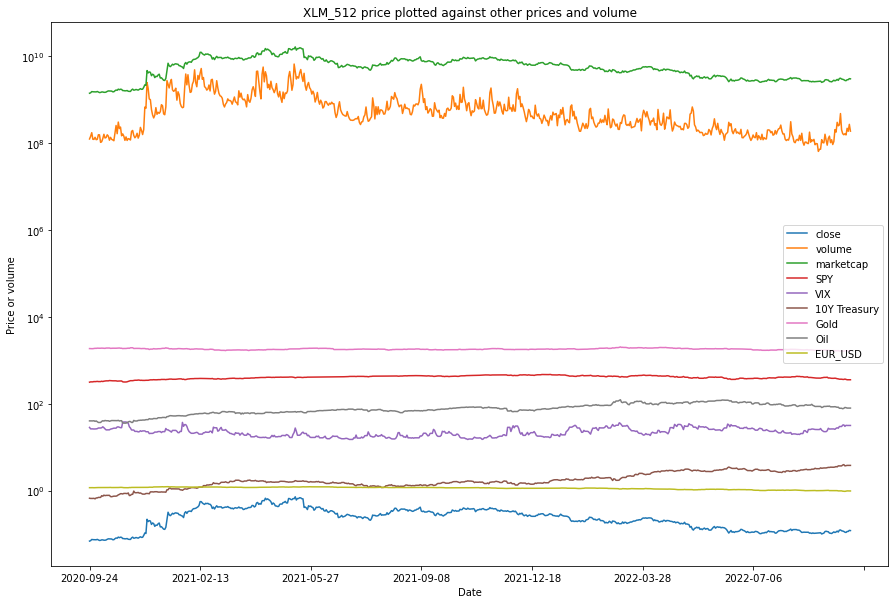

In [14]:
df.plot(y=['close', 'volume', 'marketcap',
                     'SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil','EUR_USD'], logy=True,figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price or volume')
plt.title('XLM_512 price plotted against other prices and volume')
plt.show()


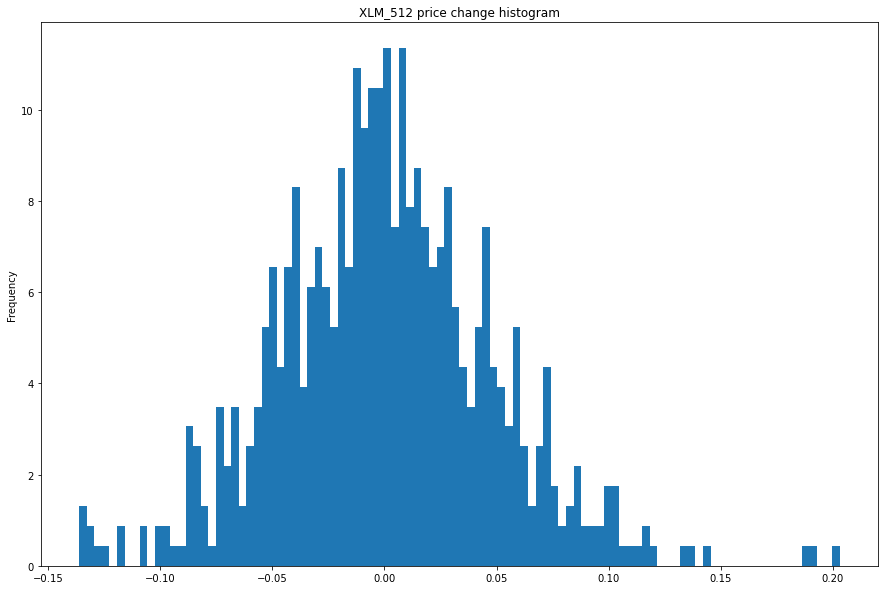

Skewness: 5.614168
Kurtosis: 78.103098


In [15]:
    plt.figure(figsize=(15,10))
    q3, q1 = df['tomorrow change'].quantile([0.99, 0.01])
    df.loc[(df['tomorrow change'] < q3) & (df['tomorrow change'] > q1)]['tomorrow change'].plot.hist(density=1,bins=100)
    plt.title('XLM_512 price change histogram')
    plt.show()
    print("Skewness: %f" % df['tomorrow change'].skew())
    print("Kurtosis: %f" % df['tomorrow change'].kurt())#sharp peak

          close     month
close  1.000000 -0.221299
month -0.221299  1.000000
          close       day
close  1.000000 -0.046867
day   -0.046867  1.000000
            close   weekday
close    1.000000 -0.009681
weekday -0.009681  1.000000
                close  day of week
close        1.000000     0.009692
day of week  0.009692     1.000000
          close       SPY
close  1.000000  0.318118
SPY    0.318118  1.000000
          close       VIX
close  1.000000 -0.571365
VIX   -0.571365  1.000000
                 close  10Y Treasury
close         1.000000     -0.399018
10Y Treasury -0.399018      1.000000
          close      Gold
close  1.000000 -0.159603
Gold  -0.159603  1.000000
          close       Oil
close  1.000000 -0.307637
Oil   -0.307637  1.000000
            close   EUR_USD
close    1.000000  0.639724
EUR_USD  0.639724  1.000000


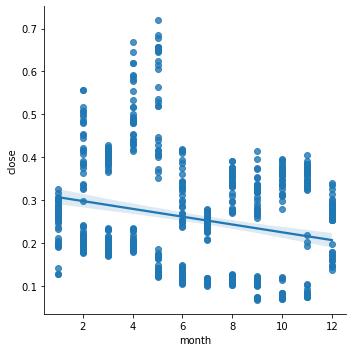

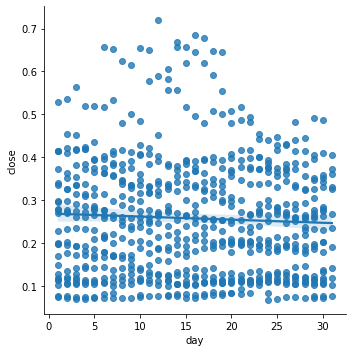

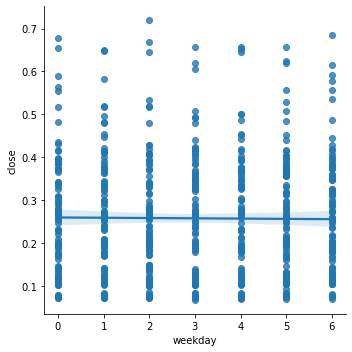

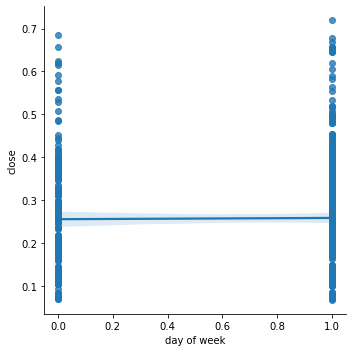

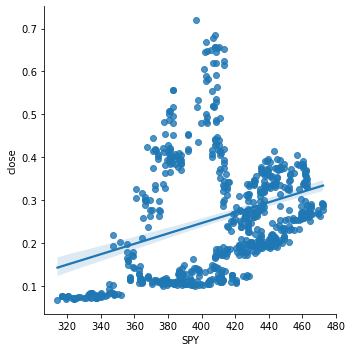

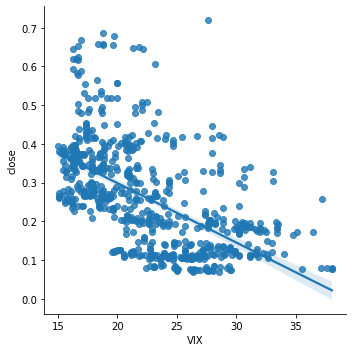

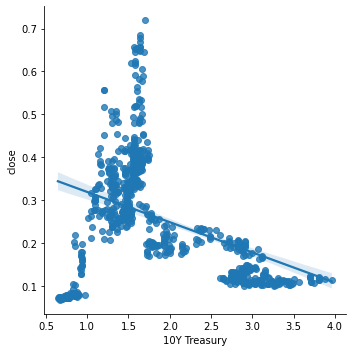

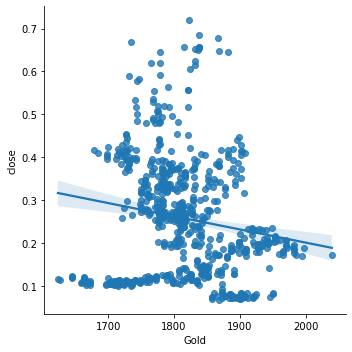

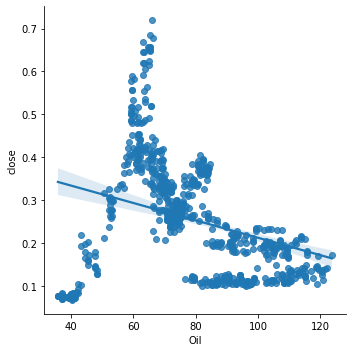

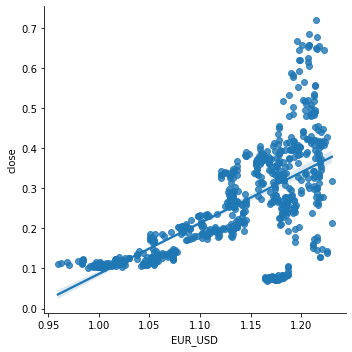

In [16]:
for i in ['month','day','weekday','day of week','SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil','EUR_USD']:
    #df.plot(x=i,y='close',kind='scatter')
    print(df[['close',i]].corr(method = 'pearson'))
    plot = sns.lmplot(y='close',x=i,data=df) 

/tmp/ipykernel_209/1290072846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['time_close']).year
/tmp/ipykernel_209/1290072846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_close'] = pd.to_datetime(df['time_close'])


<AxesSubplot:xlabel='time_close', ylabel='close'>

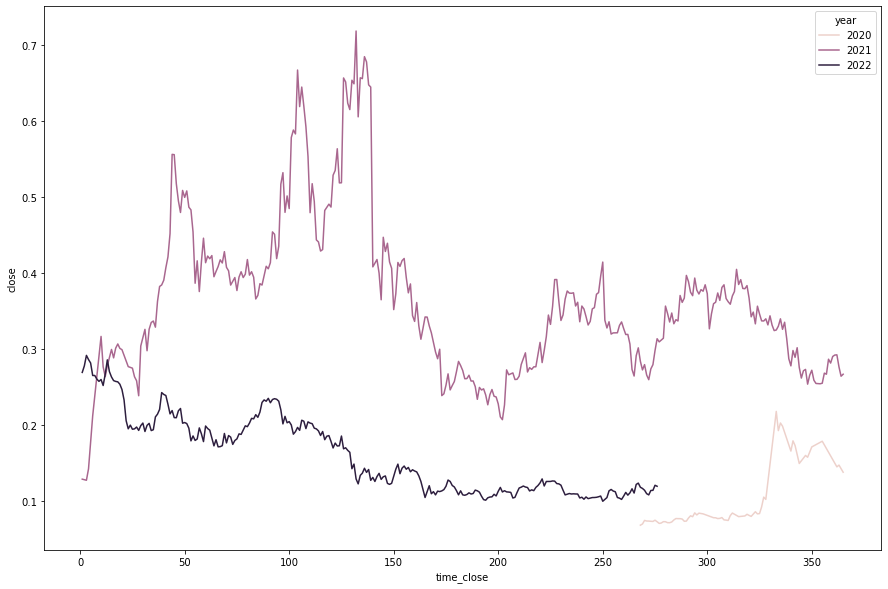

In [17]:
#check seasonality
plt.figure(figsize=(15, 10))
df['year'] = pd.DatetimeIndex(df['time_close']).year
df['time_close'] = pd.to_datetime(df['time_close'])
sns.lineplot(x=df['time_close'].dt.dayofyear, y=df['close'], hue=df['year']) #no special trends each year, close is low in mid year, high in the first half year?

In [18]:
df=df.drop(columns=['year'])

In [19]:
import statsmodels.api as sm

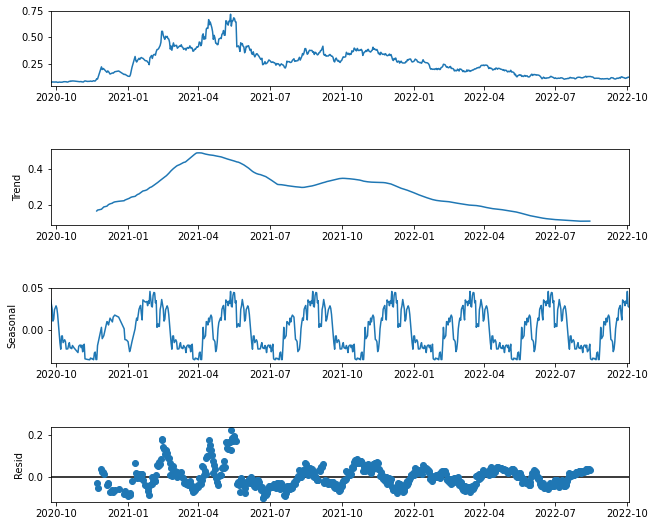

In [20]:
df_close = df[['time_close', 'close']].copy()
df_close = df_close.set_index('time_close')
df_close.head()

decomp = sm.tsa.seasonal_decompose(df_close, period=100)
fig = decomp.plot()
fig.set_size_inches(10, 8)

<AxesSubplot:>

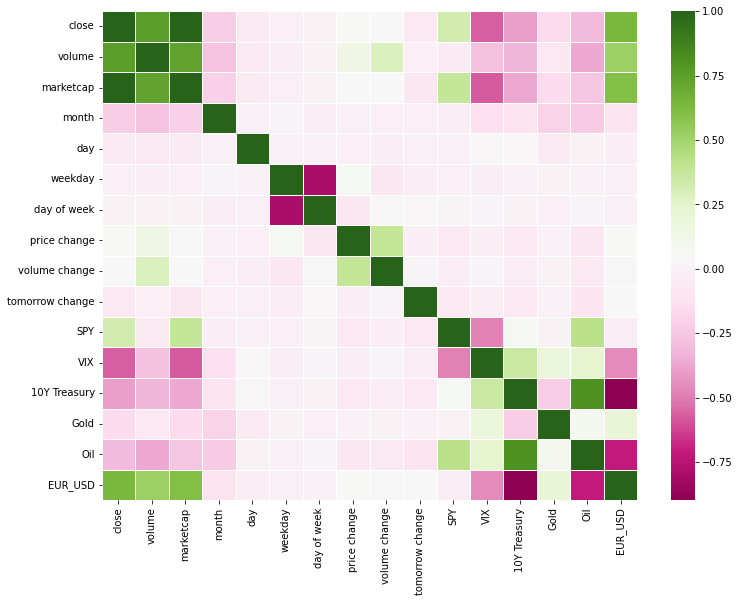

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap="PiYG",linewidths=.5)

## check stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

#ADF statistic to check stationarity
for col in df.columns[2:]:
    timeseries = df[col]
    result = adfuller(timeseries)
    #plt.figure(figsize=(15, 10))
   # ax = timeseries.plot(secondary_y=False, logy=False)

    #print(f'Testing {col} from {timeseries.index[0]:%Y-%m-%d} to {timeseries.index[-1]:%Y-%m-%d} for Stationarity')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3E}')
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]["5%"]:
        conclusion=f"Failed to Reject H_0 at 5% -> {col} Time Series is Non-Stationary"
    else:
        conclusion=f"Reject H_0 at at 5% -> {col} Time Series is Stationary"
    print(conclusion)
    print('\n')

ADF Statistic: -1.599
p-value: 4.841E-01
Failed to Reject H_0 at 5% -> close Time Series is Non-Stationary


ADF Statistic: -2.376
p-value: 1.487E-01
Failed to Reject H_0 at 5% -> volume Time Series is Non-Stationary


ADF Statistic: -1.711
p-value: 4.257E-01
Failed to Reject H_0 at 5% -> marketcap Time Series is Non-Stationary


ADF Statistic: -2.397
p-value: 1.426E-01
Failed to Reject H_0 at 5% -> month Time Series is Non-Stationary


ADF Statistic: -13.096
p-value: 1.752E-24
Reject H_0 at at 5% -> day Time Series is Stationary


ADF Statistic: -5.262
p-value: 6.555E-06
Reject H_0 at at 5% -> weekday Time Series is Stationary


ADF Statistic: -5.024
p-value: 1.992E-05
Reject H_0 at at 5% -> day of week Time Series is Stationary


ADF Statistic: -4.834
p-value: 4.689E-05
Reject H_0 at at 5% -> price change Time Series is Stationary


ADF Statistic: -15.695
p-value: 1.417E-28
Reject H_0 at at 5% -> volume change Time Series is Stationary


ADF Statistic: -4.838
p-value: 4.606E-05
Rejec

In [23]:
for i in ['SPY','VIX','Gold','Oil','EUR_USD','10Y Treasury','marketcap']:
    df[i+'_ret']=df[i].pct_change()
df

,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,...,Gold,Oil,EUR_USD,SPY_ret,VIX_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,XLM_512,2020-09-24,0.068613,1.257038e+08,1.422532e+09,9,24,3,1,-0.041776,...,1868.300049,40.310001,1.165854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,XLM_512,2020-09-25,0.070204,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,...,1857.699951,40.250000,1.167324,0.016167,-0.074711,-0.005674,-0.001488,0.001261,-0.010511,0.023040
2020-09-26,XLM_512,2020-09-26,0.074894,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,...,1857.699951,40.250000,1.167324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059
2020-09-27,XLM_512,2020-09-27,0.074085,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,...,1857.699951,40.250000,1.167324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805
2020-09-28,XLM_512,2020-09-28,0.074022,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,...,1872.800049,40.599998,1.163535,0.016609,-0.007202,0.008128,0.008696,-0.003246,0.006070,-0.000851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,XLM_512,2022-09-29,0.108473,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,...,1658.500000,81.230003,0.970817,-0.020889,0.055003,-0.001144,-0.011199,0.011669,0.011336,-0.013993
2022-09-30,XLM_512,2022-09-30,0.114305,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,...,1662.400024,79.489998,0.982956,-0.015464,-0.006910,0.002352,-0.021421,0.012503,0.015212,0.054098
2022-10-01,XLM_512,2022-10-01,0.114461,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,...,1662.400024,79.489998,0.982956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409


In [24]:
df.drop(df.groupby('symbol_id')['SPY_ret'].head(1).index, inplace=True) 
df

,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,...,Gold,Oil,EUR_USD,SPY_ret,VIX_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,XLM_512,2020-09-25,0.070204,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,...,1857.699951,40.250000,1.167324,0.016167,-0.074711,-0.005674,-0.001488,0.001261,-0.010511,0.023040
2020-09-26,XLM_512,2020-09-26,0.074894,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,...,1857.699951,40.250000,1.167324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059
2020-09-27,XLM_512,2020-09-27,0.074085,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,...,1857.699951,40.250000,1.167324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805
2020-09-28,XLM_512,2020-09-28,0.074022,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,...,1872.800049,40.599998,1.163535,0.016609,-0.007202,0.008128,0.008696,-0.003246,0.006070,-0.000851
2020-09-29,XLM_512,2020-09-29,0.073736,1.372087e+08,1.528329e+09,9,29,1,1,-0.003863,...,1894.300049,39.290001,1.167883,-0.005446,0.003055,0.011480,-0.032266,0.003737,-0.027149,-0.004224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,XLM_512,2022-09-29,0.108473,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,...,1658.500000,81.230003,0.970817,-0.020889,0.055003,-0.001144,-0.011199,0.011669,0.011336,-0.013993
2022-09-30,XLM_512,2022-09-30,0.114305,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,...,1662.400024,79.489998,0.982956,-0.015464,-0.006910,0.002352,-0.021421,0.012503,0.015212,0.054098
2022-10-01,XLM_512,2022-10-01,0.114461,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,...,1662.400024,79.489998,0.982956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409


In [25]:
df.columns

Index(['symbol_id', 'time_close', 'close', 'volume', 'marketcap', 'month',
       'day', 'weekday', 'day of week', 'price change', 'volume change',
       'tomorrow change', 'SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil',
       'EUR_USD', 'SPY_ret', 'VIX_ret', 'Gold_ret', 'Oil_ret', 'EUR_USD_ret',
       '10Y Treasury_ret', 'marketcap_ret'],
      dtype='object')

In [26]:
df=df.drop(columns=['symbol_id', 'time_close', 'close',  'volume','marketcap','SPY','10Y Treasury', 'Gold', 'Oil',
      'EUR_USD', 'VIX_ret'])
df

,month,day,weekday,day of week,price change,volume change,tomorrow change,VIX,SPY_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret
time_close,,,,,,,,,,,,,,
2020-09-25,9,25,4,1,0.023188,0.153256,0.066801,26.379999,0.016167,-0.005674,-0.001488,0.001261,-0.010511,0.023040
2020-09-26,9,26,5,0,0.066801,0.211185,-0.010805,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059
2020-09-27,9,27,6,0,-0.010805,-0.295592,-0.000851,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805
2020-09-28,9,28,0,1,-0.000851,-0.005278,-0.003863,26.190001,0.016609,0.008128,0.008696,-0.003246,0.006070,-0.000851
2020-09-29,9,29,1,1,-0.003863,0.115246,-0.002508,26.270000,-0.005446,0.011480,-0.032266,0.003737,-0.027149,-0.004224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,9,29,3,1,-0.014612,-0.060907,0.053767,31.840000,-0.020889,-0.001144,-0.011199,0.011669,0.011336,-0.013993
2022-09-30,9,30,4,1,0.053767,0.420765,0.001370,31.620001,-0.015464,0.002352,-0.021421,0.012503,0.015212,0.054098
2022-10-01,10,1,5,0,0.001370,-0.147152,0.058336,31.620001,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409


In [27]:
#df=df.drop(columns=['symbol_id', 'time_close', 'close', 'volume', 'marketcap', 'month',
#     'day', 'weekday', 'day of week', 'price change', 'volume change','SPY','10Y Treasury', 'Gold', 'Oil',
#      'EUR_USD', 'VIX_ret'])
#df=df.drop(columns=['symbol_id', 'time_close', 'close',  'volume','marketcap','SPY','10Y Treasury', 'Gold', 'Oil',
#      'EUR_USD', 'VIX_ret'])


#print(df)

train_size = int(len(df) * 0.8)

test_size = len(df) - train_size
X_train,X_test = df.drop(columns='tomorrow change').iloc[0:train_size+1,0:], df.drop(columns='tomorrow change').iloc[train_size+1:,0:]
y_train,y_test=df.iloc[0:train_size+1,6], df.iloc[train_size+1:,6]
scaler=StandardScaler()
normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

In [28]:
normalize_X_train, X_test, y_train, y_test

(        month       day   weekday  day of week  price change  volume change  \
 0    0.774458  1.088056  0.499469     0.639693      0.233545       0.181478   
 1    0.774458  1.201730  0.994447    -1.563250      0.767300       0.308040   
 2    0.774458  1.315404  1.489424    -1.563250     -0.182482      -0.799158   
 3    0.774458  1.429079 -1.480441     0.639693     -0.060661      -0.164885   
 4    0.774458  1.542753 -0.985463     0.639693     -0.097526       0.098435   
 ..        ...       ...       ...          ...           ...            ...   
 546 -0.329621 -0.162362  0.994447    -1.563250      1.064703      -1.277705   
 547 -0.329621 -0.048688  1.489424    -1.563250      0.211067      -0.392209   
 548 -0.329621  0.064986 -1.480441     0.639693      0.528157      -0.600198   
 549 -0.329621  0.178661 -0.985463     0.639693     -0.512143      -0.006947   
 550 -0.329621  0.292335 -0.490486     0.639693      0.285455      -0.271602   
 
           VIX   SPY_ret  Gold_ret   O

## linear regression: X is all stationary variable, y is tmr change

In [29]:
#X=df[['SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil', 'EUR_USD']]
#y=df['tomorrow change']
#train_size = int(len(df) * 0.8)
#test_size = len(df) - train_size
#X_train,X_test = df.iloc[0:train_size, 12:18], df.iloc[train_size:len(df), 12:18]
#y_train,y_test=df.iloc[0:train_size, 11], df.iloc[train_size:len(df), 11]
#scaler=StandardScaler()
#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)*/


model=LinearRegression().fit(X_train, y_train)
y_pred=model.predict(X_test)

In [30]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) #not accurate

Coefficient of determination: -0.01


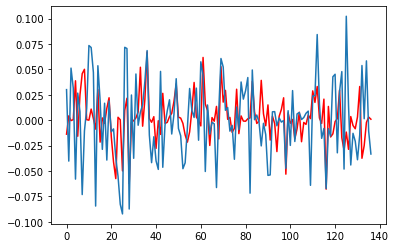

In [31]:
plt.plot(y_pred,color='red')#red is predicted value
plt.plot(list(y_test))#true value

In [32]:
df.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret'],
      dtype='object')

##ols

In [33]:
#ols
df2=df.copy()
df2.columns = [c.replace(' ', '_') for c in df2.columns]
df2=df2.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})
reg_mul = smf.ols('tomorrow_change ~  month+day+weekday+day_of_week+price_change+volume_change+SPY_ret+VIX+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret+marketcap_ret', data = df2)
res_mul = reg_mul.fit()
print(res_mul.summary())

                            OLS Regression Results                            
Dep. Variable:        tomorrow_change   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.103
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           0.000166
Time:                        06:41:31   Log-Likelihood:                 823.53
No. Observations:                 688   AIC:                            -1619.
Df Residuals:                     674   BIC:                            -1556.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0010      0.021     

In [34]:
df_clean=df_clean.set_index('time_close')

In [35]:
#add LTC_2 and XRP_52
ltc=df_clean[df_clean['symbol_id']=='LTC_2']['close']
xrp=df_clean[df_clean['symbol_id']=='XRP_52']['close']
doge=df_clean[df_clean['symbol_id']=='DOGE_74']['close']
eth=df_clean[df_clean['symbol_id']=='ETH_1027']['close']
btc=df_clean[df_clean['symbol_id']=='BTC_1']['close']
xmr=df_clean[df_clean['symbol_id']=='XMR_328']['close']

df3=df.copy()
df3['ltc']=ltc
df3['xrp']=xrp
df3['doge']=doge
df3['eth']=eth
df3['btc']=btc
df3['xmr']=xmr
df3.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret', 'ltc',
       'xrp', 'doge', 'eth', 'btc', 'xmr'],
      dtype='object')

In [36]:
df3['ltc_ret']=df3['ltc'].pct_change()
df3['xrp_ret']=df3['xrp'].pct_change()
df3['doge_ret']=df3['doge'].pct_change()
df3['eth_ret']=df3['eth'].pct_change()
df3['btc_ret']=df3['btc'].pct_change()
df3['xmr_ret']=df3['xmr'].pct_change()
df3

,month,day,weekday,day of week,price change,volume change,tomorrow change,VIX,SPY_ret,Gold_ret,...,doge,eth,btc,xmr,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,9,25,4,1,0.023188,0.153256,0.066801,26.379999,0.016167,-0.005674,...,0.002629,348.029329,10773.534000,91.695987,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-26,9,26,5,0,0.066801,0.211185,-0.010805,26.379999,0.000000,0.000000,...,0.002701,351.552190,10668.141934,93.026053,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505
2020-09-27,9,27,6,0,-0.010805,-0.295592,-0.000851,26.379999,0.000000,0.000000,...,0.002722,359.182175,10769.604523,95.044383,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696
2020-09-28,9,28,0,1,-0.000851,-0.005278,-0.003863,26.190001,0.016609,0.008128,...,0.002736,358.283277,10881.984006,97.741001,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372
2020-09-29,9,29,1,1,-0.003863,0.115246,-0.002508,26.270000,-0.005446,0.011480,...,0.002673,355.271083,10719.833837,95.227073,-0.013785,-0.007553,-0.022978,-0.008407,-0.014901,-0.025720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,9,29,3,1,-0.014612,-0.060907,0.053767,31.840000,-0.020889,-0.001144,...,0.060484,1333.964086,19445.124438,146.795038,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601
2022-09-30,9,30,4,1,0.053767,0.420765,0.001370,31.620001,-0.015464,0.002352,...,0.060628,1336.776474,19532.627889,148.238784,0.011207,0.073597,0.002384,0.002108,0.004500,0.009835
2022-10-01,10,1,5,0,0.001370,-0.147152,0.058336,31.620001,0.000000,0.000000,...,0.062382,1327.829013,19400.000434,147.036460,-0.009107,-0.010923,0.028931,-0.006693,-0.006790,-0.008111


In [37]:
df3.drop(df3['ltc_ret'].head(1).index, inplace=True) 
df3=df3.drop(columns=['ltc','xrp','doge','eth','btc','xmr'])
df3

,month,day,weekday,day of week,price change,volume change,tomorrow change,VIX,SPY_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret
time_close,,,,,,,,,,,,,,,,,,,,
2020-09-26,9,26,5,0,0.066801,0.211185,-0.010805,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505
2020-09-27,9,27,6,0,-0.010805,-0.295592,-0.000851,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696
2020-09-28,9,28,0,1,-0.000851,-0.005278,-0.003863,26.190001,0.016609,0.008128,0.008696,-0.003246,0.006070,-0.000851,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372
2020-09-29,9,29,1,1,-0.003863,0.115246,-0.002508,26.270000,-0.005446,0.011480,-0.032266,0.003737,-0.027149,-0.004224,-0.013785,-0.007553,-0.022978,-0.008407,-0.014901,-0.025720
2020-09-30,9,30,2,1,-0.002508,-0.116622,0.022203,26.370001,0.007582,-0.003590,0.023670,0.005413,0.049612,-0.001882,-0.004501,-0.002013,-0.000445,0.007549,0.008690,0.048048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,9,29,3,1,-0.014612,-0.060907,0.053767,31.840000,-0.020889,-0.001144,-0.011199,0.011669,0.011336,-0.013993,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601
2022-09-30,9,30,4,1,0.053767,0.420765,0.001370,31.620001,-0.015464,0.002352,-0.021421,0.012503,0.015212,0.054098,0.011207,0.073597,0.002384,0.002108,0.004500,0.009835
2022-10-01,10,1,5,0,0.001370,-0.147152,0.058336,31.620001,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409,-0.009107,-0.010923,0.028931,-0.006693,-0.006790,-0.008111


In [38]:
train_size = int(len(df3) * 0.8)
test_size = len(df3) - train_size
X_train,X_test = df3.drop(columns='tomorrow change').iloc[0:train_size+1,0:], df3.drop(columns='tomorrow change').iloc[train_size+1:,0:]
y_train,y_test=df3.iloc[0:train_size+1,6], df3.iloc[train_size+1:,6]
scaler=StandardScaler()
normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

#X_train,X_test = df3.iloc[0:train_size, 12:20], df3.iloc[train_size:len(df3), 12:20]
#y_train,y_test=df3.iloc[0:train_size, 11], df3.iloc[train_size:len(df3), 11]
#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

model2=LinearRegression().fit(normalize_X_train, y_train)
y_pred=model2.predict(normalize_X_test)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) #not accurate

Coefficient of determination: -0.02


In [39]:
df3.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret',
       'ltc_ret', 'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret', 'xmr_ret'],
      dtype='object')

In [40]:
#ols
df4=df3.copy()#0.071
df4.columns = [c.replace(' ', '_') for c in df4.columns]
df4=df4.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})
reg_mul2 = smf.ols('tomorrow_change ~  month+day+weekday+day_of_week+price_change+volume_change+SPY_ret+VIX+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret+ltc_ret+xrp_ret+doge_ret+eth_ret+btc_ret+xmr_ret+marketcap_ret', data = df4)
res_mul2 = reg_mul2.fit()
print(res_mul2.summary()) #accuracy increases

                            OLS Regression Results                            
Dep. Variable:        tomorrow_change   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.077
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.25e-05
Time:                        06:41:34   Log-Likelihood:                 831.08
No. Observations:                 687   AIC:                            -1622.
Df Residuals:                     667   BIC:                            -1532.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0060      0.021     

In [41]:
#change label to close
#reg_mul3 = smf.ols('close ~  SPY+VIX+Treasury10y+Gold+Oil+EUR_USD+ltc+xrp', data = df4)
#res_mul3 = reg_mul3.fit()
#print(res_mul3.summary())

In [42]:
#X=df3[['SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil', 'EUR_USD','ltc','xrp']]
#y=df3[['tomorrow change']]
#tss = TimeSeriesSplit(n_splits = 2)
#for train_index, test_index in tss.split(X):
#    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#model8=LinearRegression().fit(normalize_X_train, y_train)
#normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)
#y_pred=model8.predict(normalize_X_test)
#print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

In [43]:
df3.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret',
       'ltc_ret', 'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret', 'xmr_ret'],
      dtype='object')

## logistic regression X is index return, y is binary response of tmr return

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
df3.loc[df3['tomorrow change'] < 0, 'target'] = 0
df3.loc[df3['tomorrow change'] > 0, 'target'] = 1
df3


,month,day,weekday,day of week,price change,volume change,tomorrow change,VIX,SPY_ret,Gold_ret,...,EUR_USD_ret,10Y Treasury_ret,marketcap_ret,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret,target
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-26,9,26,5,0,0.066801,0.211185,-0.010805,26.379999,0.000000,0.000000,...,0.000000,0.000000,0.067059,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505,0.0
2020-09-27,9,27,6,0,-0.010805,-0.295592,-0.000851,26.379999,0.000000,0.000000,...,0.000000,0.000000,-0.010805,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696,0.0
2020-09-28,9,28,0,1,-0.000851,-0.005278,-0.003863,26.190001,0.016609,0.008128,...,-0.003246,0.006070,-0.000851,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372,0.0
2020-09-29,9,29,1,1,-0.003863,0.115246,-0.002508,26.270000,-0.005446,0.011480,...,0.003737,-0.027149,-0.004224,-0.013785,-0.007553,-0.022978,-0.008407,-0.014901,-0.025720,0.0
2020-09-30,9,30,2,1,-0.002508,-0.116622,0.022203,26.370001,0.007582,-0.003590,...,0.005413,0.049612,-0.001882,-0.004501,-0.002013,-0.000445,0.007549,0.008690,0.048048,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,9,29,3,1,-0.014612,-0.060907,0.053767,31.840000,-0.020889,-0.001144,...,0.011669,0.011336,-0.013993,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601,1.0
2022-09-30,9,30,4,1,0.053767,0.420765,0.001370,31.620001,-0.015464,0.002352,...,0.012503,0.015212,0.054098,0.011207,0.073597,0.002384,0.002108,0.004500,0.009835,1.0
2022-10-01,10,1,5,0,0.001370,-0.147152,0.058336,31.620001,0.000000,0.000000,...,0.000000,0.000000,0.001409,-0.009107,-0.010923,0.028931,-0.006693,-0.006790,-0.008111,1.0


In [46]:
df3.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret',
       'ltc_ret', 'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret', 'xmr_ret',
       'target'],
      dtype='object')

## use decision tree on data

In [47]:
#make tomorrow change a binary response#0.49
#df3['target']=np.sign(df3['tomorrow change'])
#df3=df3.drop(columns=['year'])
#X3=df5.iloc[:,12:20]

from sklearn.metrics import accuracy_score

X_train,X_test = df3.drop(columns=['tomorrow change','target']).iloc[0:train_size+1,0:], df3.drop(columns=['tomorrow change','target']).iloc[train_size+1:,0:]
y_train,y_test=df3.iloc[0:train_size+1,20], df3.iloc[train_size+1:,20]

#model3=tree_clf.fit(X_train3, y_train3)

model3=LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=model3.predict(X_test)
#print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) 
#confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[52 15]
 [55 15]]


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.48905109489051096

[[32 35]
 [32 38]]
0.5109489051094891


/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


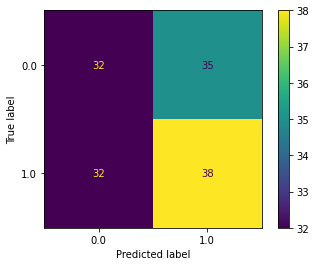

In [48]:
from sklearn.metrics import plot_confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
model3=tree_clf.fit(X_train, y_train)
y_pred=model3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(tree_clf, X_test, y_test) 

In [49]:
import statsmodels.formula.api as smf
df7=df3.copy()
df7.columns = [c.replace(' ', '_') for c in df7.columns]
df7=df7.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})
formula = 'target ~ month+day+weekday+day_of_week+price_change+volume_change+SPY_ret+VIX+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret+ltc_ret+xrp_ret+doge_ret+eth_ret+btc_ret+xmr_ret+marketcap_ret'
model = smf.glm(formula = formula, data=df7, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  687
Model:                            GLM   Df Residuals:                      667
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -451.02
Date:                Wed, 16 Nov 2022   Deviance:                       902.03
Time:                        06:41:48   Pearson chi2:                     682.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07043
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1857      0.598     

In [50]:
##glm
df6=df3.copy()
df6.columns = [c.replace(' ', '_') for c in df6.columns]
df6=df6.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})

model8 = smf.glm(formula='target ~ SPY_ret+VIX+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret+ltc_ret+xrp_ret', data = df6,family=sm.families.Binomial())
results = model8.fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  687
Model:                            GLM   Df Residuals:                      678
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -455.73
Date:                Wed, 16 Nov 2022   Deviance:                       911.47
Time:                        06:41:51   Pearson chi2:                     684.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05758
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0541      0.370     

## change y to 4 categories: (decision tree)

In [51]:
print(df['tomorrow change'].quantile([0.25,0.50,0.75]))
Q3 = df['tomorrow change'].quantile(0.75)
Q1 = df['tomorrow change'].quantile(0.25)
Q2 = df['tomorrow change'].quantile(0.50)

0.25   -0.031408
0.50   -0.000511
0.75    0.029424
Name: tomorrow change, dtype: float64


In [52]:
#divide into 4 categories
df3.loc[df3['tomorrow change'] < Q1, 'target2'] = 0
df3.loc[(df3['tomorrow change'] >= Q1)&(df3['tomorrow change'] < Q2), 'target2'] = 1
df3.loc[(df3['tomorrow change'] >= Q2)&(df3['tomorrow change'] < Q3), 'target2'] = 2
df3.loc[df3['tomorrow change'] >= Q3, 'target2'] = 3
df3

,month,day,weekday,day of week,price change,volume change,tomorrow change,VIX,SPY_ret,Gold_ret,...,10Y Treasury_ret,marketcap_ret,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret,target,target2
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-26,9,26,5,0,0.066801,0.211185,-0.010805,26.379999,0.000000,0.000000,...,0.000000,0.067059,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505,0.0,1.0
2020-09-27,9,27,6,0,-0.010805,-0.295592,-0.000851,26.379999,0.000000,0.000000,...,0.000000,-0.010805,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696,0.0,1.0
2020-09-28,9,28,0,1,-0.000851,-0.005278,-0.003863,26.190001,0.016609,0.008128,...,0.006070,-0.000851,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372,0.0,1.0
2020-09-29,9,29,1,1,-0.003863,0.115246,-0.002508,26.270000,-0.005446,0.011480,...,-0.027149,-0.004224,-0.013785,-0.007553,-0.022978,-0.008407,-0.014901,-0.025720,0.0,1.0
2020-09-30,9,30,2,1,-0.002508,-0.116622,0.022203,26.370001,0.007582,-0.003590,...,0.049612,-0.001882,-0.004501,-0.002013,-0.000445,0.007549,0.008690,0.048048,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,9,29,3,1,-0.014612,-0.060907,0.053767,31.840000,-0.020889,-0.001144,...,0.011336,-0.013993,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601,1.0,3.0
2022-09-30,9,30,4,1,0.053767,0.420765,0.001370,31.620001,-0.015464,0.002352,...,0.015212,0.054098,0.011207,0.073597,0.002384,0.002108,0.004500,0.009835,1.0,2.0
2022-10-01,10,1,5,0,0.001370,-0.147152,0.058336,31.620001,0.000000,0.000000,...,0.000000,0.001409,-0.009107,-0.010923,0.028931,-0.006693,-0.006790,-0.008111,1.0,3.0


In [53]:
df3.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret',
       'ltc_ret', 'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret', 'xmr_ret',
       'target', 'target2'],
      dtype='object')

In [54]:
from sklearn.metrics import classification_report

In [55]:
X_train,X_test = df3.drop(columns=['tomorrow change','target','target2']).iloc[0:train_size+1,0:], df3.drop(columns=['tomorrow change','target','target2']).iloc[train_size+1:,0:]
y_train,y_test=df3.iloc[0:train_size+1,21], df3.iloc[train_size+1:,21]

tree_clf = DecisionTreeClassifier(max_depth=100, random_state=42)

model4=tree_clf.fit(X_train, y_train)

y_pred=model4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[ 9  9  9  4]
 [10  8 15  2]
 [ 5 10 16 10]
 [ 6  9 11  4]]
              precision    recall  f1-score   support

         0.0       0.30      0.29      0.30        31
         1.0       0.22      0.23      0.23        35
         2.0       0.31      0.39      0.35        41
         3.0       0.20      0.13      0.16        30

    accuracy                           0.27       137
   macro avg       0.26      0.26      0.26       137
weighted avg       0.26      0.27      0.26       137



0.27007299270072993

## LASSO to predict tmr_ret

In [56]:
#lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
from sklearn.kernel_ridge import KernelRidge
import math
from sklearn.metrics import mean_squared_error

In [57]:
df3=df3.drop(columns=['target','target2'])
df3.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret',
       'ltc_ret', 'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret', 'xmr_ret'],
      dtype='object')

In [58]:
model5 = Lasso(alpha=0.001)

X_train,X_test = df3.drop(columns='tomorrow change').iloc[0:train_size+1,0:], df3.drop(columns='tomorrow change').iloc[train_size+1:,0:]
y_train,y_test=df3.iloc[0:train_size+1,6], df3.iloc[train_size+1:,6]
scaler=StandardScaler()
#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

model5.fit(normalize_X_train, y_train)
y_pred=model5.predict(normalize_X_test)
#print(model5.score(normalize_X_test, y_test), model5.score(normalize_X_train, y_train))

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))
#poor performance
#0.037
#0.064


0.03840361641999799
0.016990919362489643


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

0.044546064171796296

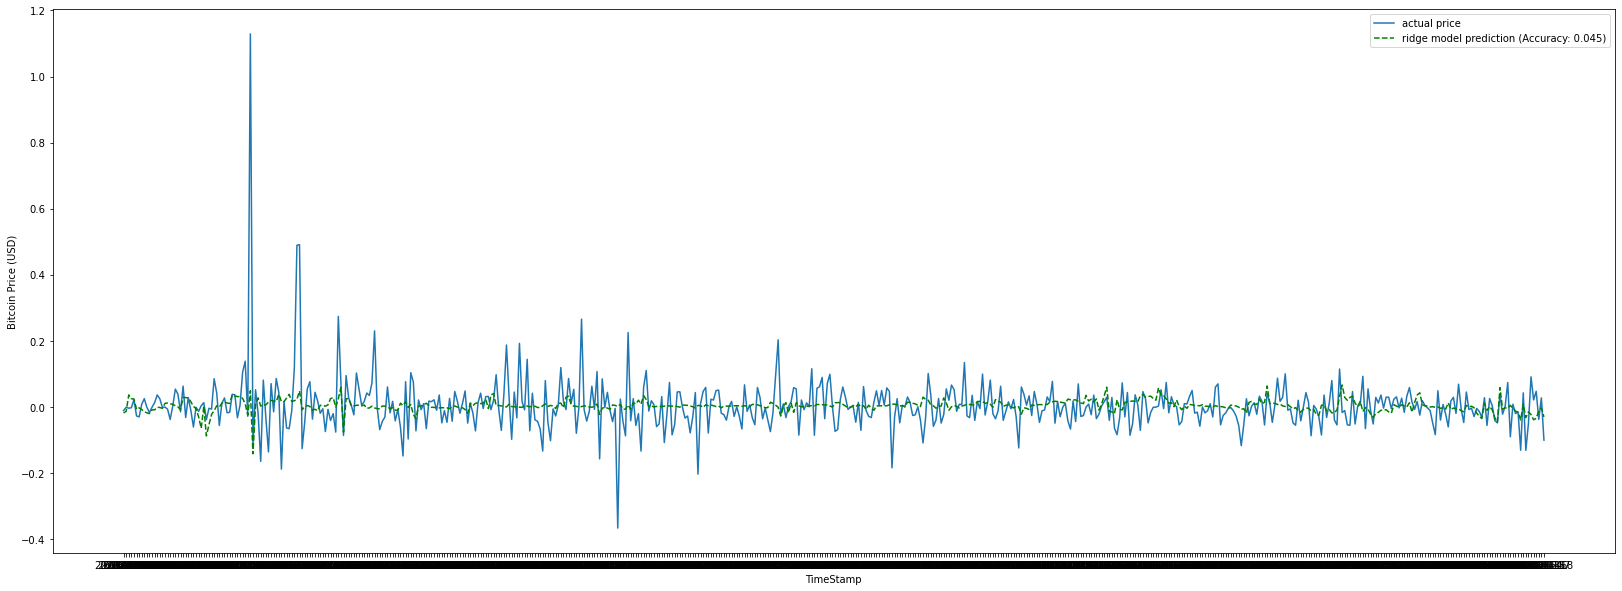

In [60]:
X_poly = PolynomialFeatures(degree=5).fit_transform(X_train)
m_ridge = Ridge(alpha = 0.5, solver='lsqr')
m_ridge.fit(X_poly, y_train)
score_ridge = m_ridge.score(X_poly, y_train)
y_pred_ridge = m_ridge.predict(X_poly)

plt.figure(figsize = (28,10))
plt.plot( y_train, label='actual price')
plt.plot(y_pred_ridge, 'g--', label='ridge model prediction (Accuracy: {})'.format(round(score_ridge, 3)))
#plt.title('Bitcoin Price over last {} days, actual vs. predicted (from trained linear model w/ ridge regularization)'.format(days))
plt.xlabel('TimeStamp')
plt.ylabel('Bitcoin Price (USD)')
plt.legend(loc='upper right')
score_ridge

0.07296563028281944
-2.5485420810635744


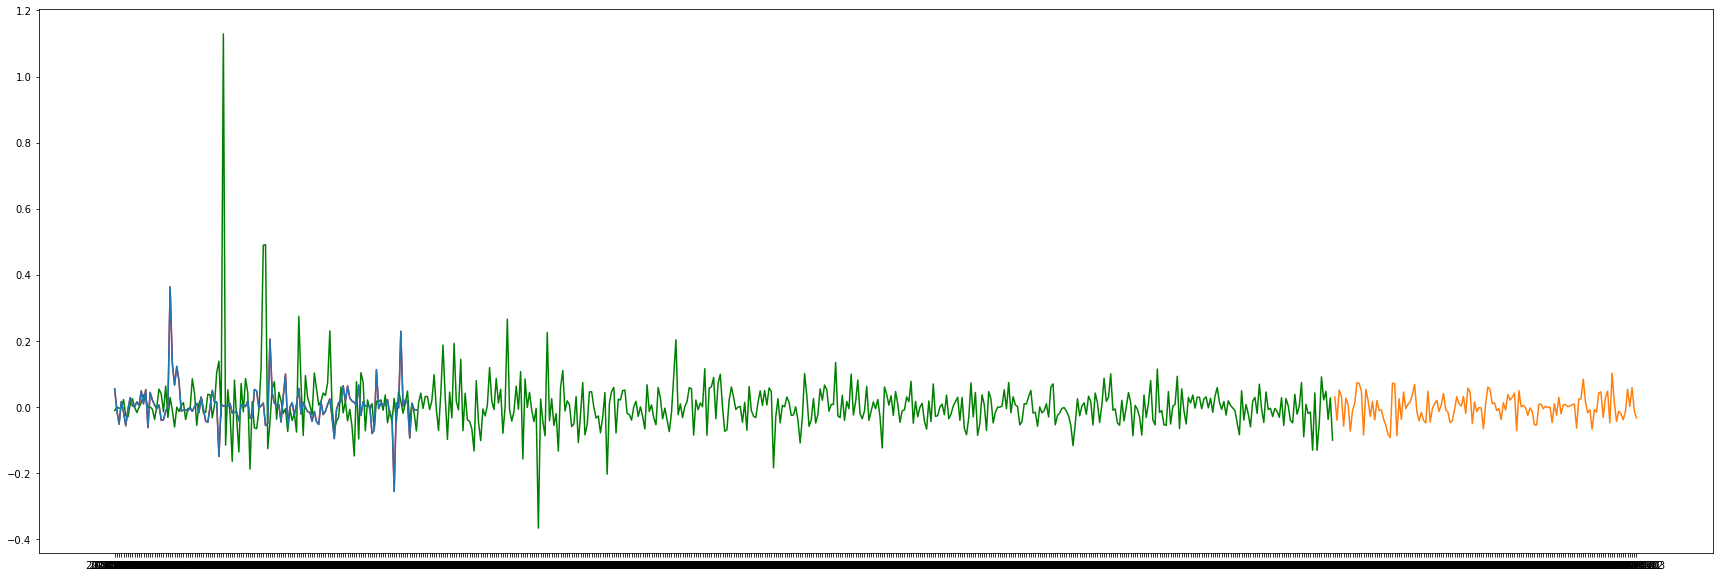

In [61]:
model6 = KernelRidge(kernel='polynomial',alpha=1)
model6.fit(normalize_X_train, y_train)
#print(model6.score(normalize_X_train, y_train))
y_pred = model6.predict(normalize_X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

fig, ax = plt.subplots(figsize = [30,10])
ax.plot(y_pred,color='red')
ax.plot(y_train,color='green')
ax.plot(model6.predict(normalize_X_test))
ax.plot(y_test)
plt.show()

## SVM

In [62]:
from sklearn import svm
model7 = svm.SVR(kernel = 'poly')
model7.fit(normalize_X_train,y_train)
model7.score(normalize_X_train,y_train)
y_pred = model7.predict(normalize_X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

0.07033487321145347
-2.2972714410636734


## generalized linear regression

In [63]:
import statsmodels.formula.api as smf

In [64]:
df3.columns

Index(['month', 'day', 'weekday', 'day of week', 'price change',
       'volume change', 'tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret',
       'Oil_ret', 'EUR_USD_ret', '10Y Treasury_ret', 'marketcap_ret',
       'ltc_ret', 'xrp_ret', 'doge_ret', 'eth_ret', 'btc_ret', 'xmr_ret'],
      dtype='object')

In [65]:

#results.predict(y_

## RNN with LSTM

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
df3

,month,day,weekday,day of week,price change,volume change,tomorrow change,VIX,SPY_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,marketcap_ret,ltc_ret,xrp_ret,doge_ret,eth_ret,btc_ret,xmr_ret
time_close,,,,,,,,,,,,,,,,,,,,
2020-09-26,9,26,5,0,0.066801,0.211185,-0.010805,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.067059,0.029021,0.049036,0.027243,0.010122,-0.009782,0.014505
2020-09-27,9,27,6,0,-0.010805,-0.295592,-0.000851,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010805,0.005422,-0.000456,0.007860,0.021704,0.009511,0.021696
2020-09-28,9,28,0,1,-0.000851,-0.005278,-0.003863,26.190001,0.016609,0.008128,0.008696,-0.003246,0.006070,-0.000851,0.002042,0.005170,0.005012,-0.002503,0.010435,0.028372
2020-09-29,9,29,1,1,-0.003863,0.115246,-0.002508,26.270000,-0.005446,0.011480,-0.032266,0.003737,-0.027149,-0.004224,-0.013785,-0.007553,-0.022978,-0.008407,-0.014901,-0.025720
2020-09-30,9,30,2,1,-0.002508,-0.116622,0.022203,26.370001,0.007582,-0.003590,0.023670,0.005413,0.049612,-0.001882,-0.004501,-0.002013,-0.000445,0.007549,0.008690,0.048048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,9,29,3,1,-0.014612,-0.060907,0.053767,31.840000,-0.020889,-0.001144,-0.011199,0.011669,0.011336,-0.013993,0.012806,0.004518,-0.003809,0.000887,0.017353,0.012601
2022-09-30,9,30,4,1,0.053767,0.420765,0.001370,31.620001,-0.015464,0.002352,-0.021421,0.012503,0.015212,0.054098,0.011207,0.073597,0.002384,0.002108,0.004500,0.009835
2022-10-01,10,1,5,0,0.001370,-0.147152,0.058336,31.620001,0.000000,0.000000,0.000000,0.000000,0.000000,0.001409,-0.009107,-0.010923,0.028931,-0.006693,-0.006790,-0.008111
